# Gun Violence Analysis - First Version

5/26/2019  
  
This analysis continues on the work from the data exploratory phase of Gun Violence in the United States between 2014 - 2016 with data from [Gun Violence Archive](https://www.gunviolencearchive.org/).
  
Kyle Wright  
Rachel Lee  
Saira Gurung  

In [3]:
import numpy as np
import pandas as pd
from functools import reduce
import altair as alt
alt.renderers.enable('notebook')
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

Import cleaned dataset prepared in our data exploratory phase.

In [4]:
df = pd.read_csv('Data/gun_violence.csv')

Convert `Incident Date` to a datetime object

In [5]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], format="%B %d, %Y")

Drop `Unnamed` column

In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

<hr style="height:0;border:1px solid #ececec" />

# Claim/Objective

In our Data Exploratory phase, we had wanted to use the dataset to analyze the following:
<ol>
    <li>Is there a correlation between Police involvement and crimes also involving children and teens?</li>
    <li>Is there seasonality to gun violence?</li>
    <li>Frequency of police involvement in acts of gun violence?</li>
</ol>

However, upon further analysis on our dataset, we 

Claim 1: Intentional gun violence leads to more deaths while accidental incidents result in a smaller number of deaths.

Claim 2: Gun violence incidents tend to rise when the weather is warmer or during the holiday seasons.

Claim 3: States with the highest number of gun crimes does not necessarily have the largest average number of deaths or injuries occurring from the incidents.


<hr style="height:0;border:1px solid #ececec" />

# Setting up color palette

We first begin by setting a color palette for the visualization so that all our referencing for the Categories will be consistent.

Using the ColorBrewer website (http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=4), we determine a color palette that is photovopy safe.

In [7]:
df.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

In [8]:
palette = alt.Scale(domain=['Accidental', 'Intentional', 'Mass Shootings','Police Involvement'], \
                  range=['#2b83ba', '#fdae61', '#abdda4','#d7191c'])

<hr/>

# To support our claim, we have developed the following visualizations:

## 1. Injuries and deaths and the correlation to its category?

In [9]:
df1 = df.copy()

In [10]:
df1 = df1.set_index(['Incident Date','Address']).sort_values('Incident Date', ascending=True)

Assigning binary values to killed and injured

Groupby `Incident Date` and `Category` to get the sum of # Killed and # Injured by date and category

In [17]:
df2 = df1.groupby(['Incident Date','Category']).sum().reset_index()

In [18]:
source = df2

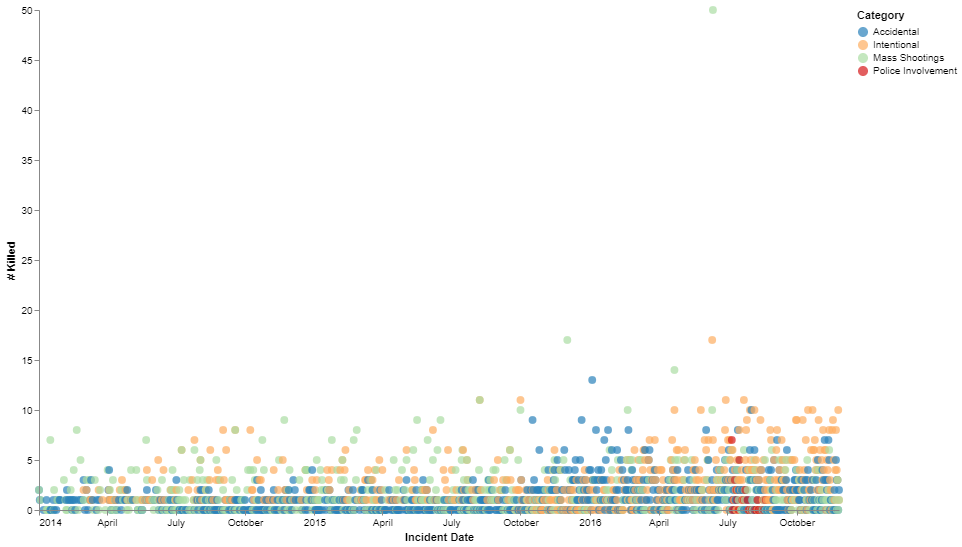

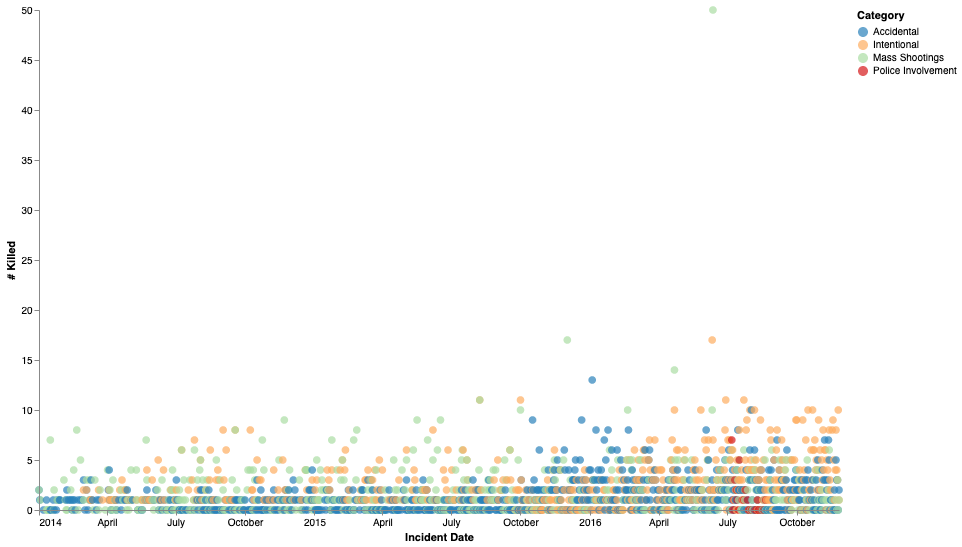

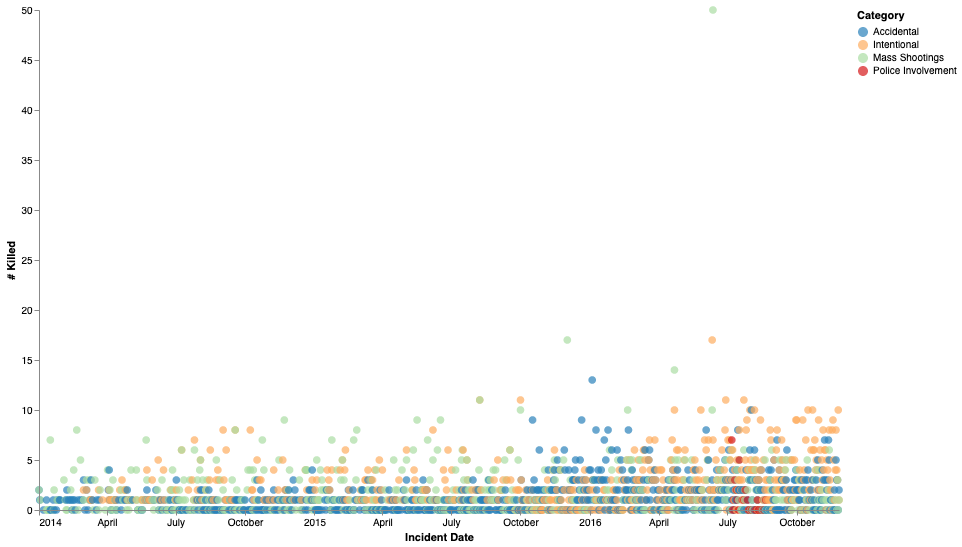

In [19]:
chart = alt.Chart(source).mark_circle(size = 60).encode(
    x = 'Incident Date',
    y = '# Killed',
    color = alt.Color('Category', scale=palette),
    tooltip = ['Category','Incident Date','# Killed','# Injured']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 800,
    height = 500
)

### Narrative
We were interested in the correlation between gun incident types and the category associated. This visualization is able to show the amount of killings per category over the range of dates in the data set. From here we can visually see that intentional incidents occur most often in the 5 to 10 death range, while accident incidents occur with 1 to 2 deaths most often. Hovering over each incident will give the category, date, injuries, and death.


### Data Wrangling
1. Delete duplicates from the data set
2. Drop unneeded columns
3. Group by Data and category to acquire the sum of these category's statistics

### Road Map
1. Include Age in the analysis
2. Include Injuries in a better way than tooltips to the visualization

## 2. Is there seasonality to gun violence?

#### We look at the pattern for each incident category

We first begin by making a copy of the dataframe for analysis and renaming the column `Incident Date` to `Date`.

In [18]:
df_seasonality = df.copy()
df_seasonality.rename(columns={'Incident Date': 'Date'}, inplace=True)

In [19]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult


Assigning a Period to each incident (Quarter).

In [20]:
df_seasonality['Period'] = df_seasonality.Date.apply(lambda x: x.to_period("Q").to_timestamp())

In [21]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age,Period
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult,2016-10-01
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult,2016-10-01
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult,2016-10-01
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult,2016-10-01
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult,2016-10-01


Checking the available unique categories of incidents.

In [22]:
df_seasonality.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

Create a new dataframe for plotting the chart on gun violence occurence by period.

In [23]:
seasonality = df_seasonality.groupby(['Period', 'Category'], as_index=False)['Date'].count().rename(columns={'Date':'Count'})

In [24]:
seasonality.head()

,Period,Category,Count
0,2014-01-01,Accidental,54
1,2014-01-01,Intentional,9
2,2014-01-01,Mass Shootings,50
3,2014-04-01,Accidental,52
4,2014-04-01,Intentional,40


### Overall seasonality of gun violence in the United States between 2014 - 2016

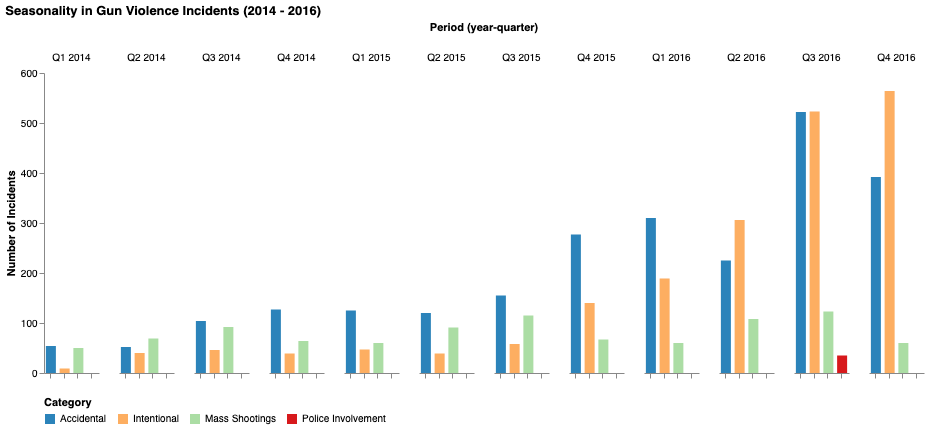

In [25]:
chart = alt.Chart(seasonality, title='Seasonality in Gun Violence Incidents (2014 - 2016)', name='seasonality') \
        .mark_bar(size=10) \
        .encode(
    column = alt.Column('Period', timeUnit='yearquarter'),
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=palette),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 55
).configure_legend(
     orient = "bottom"
)

### Visualizing Individual Categories by Month

Visualizing the trend for Accidental Gun Violence Incidents

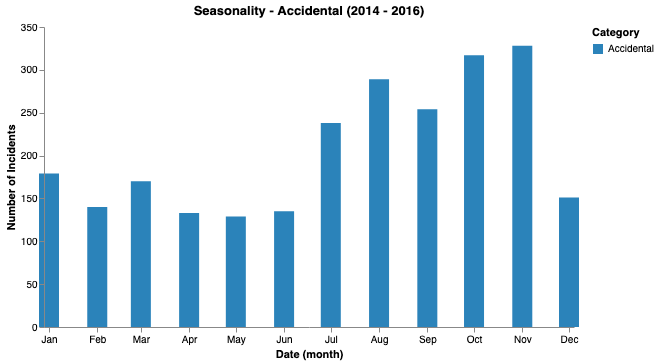

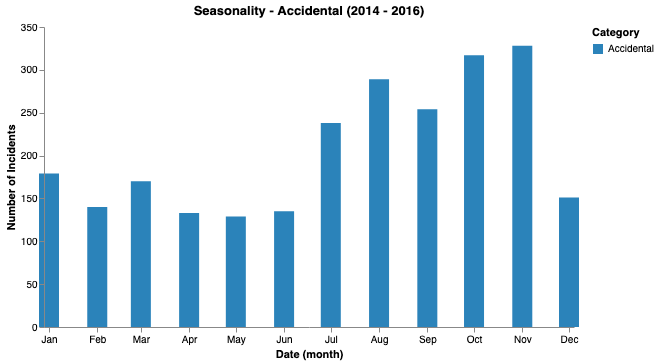

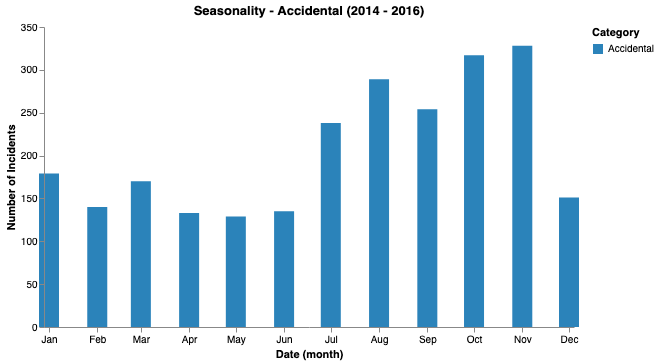

In [26]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Accidental'], title='Seasonality - Accidental (2014 - 2016)', name='seasonality_accidental') \
        .mark_bar(size=20, color='#1f77b4') \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#2b83ba'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Intentional Gun Violence Incidents

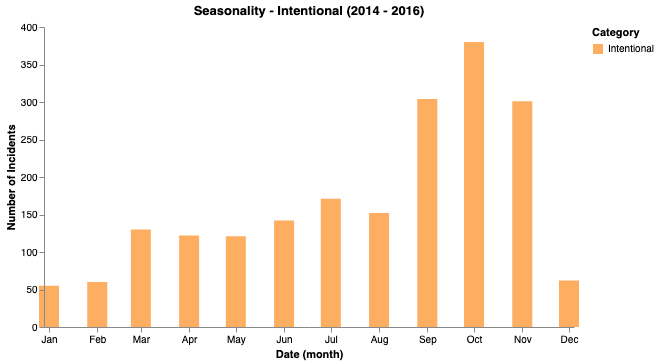

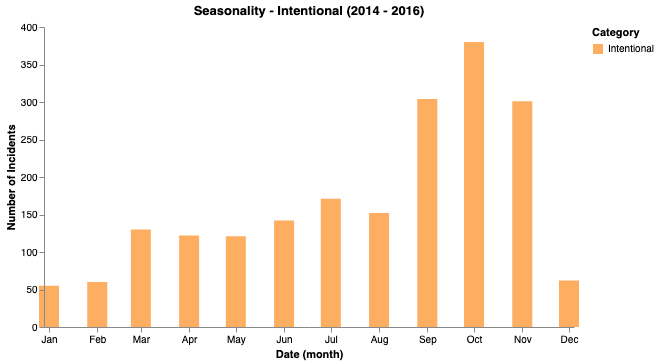

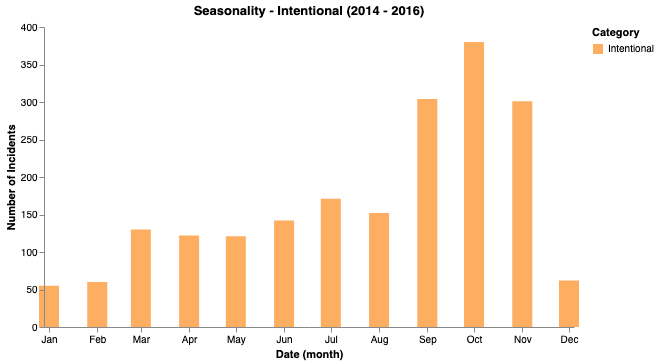

In [27]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Intentional'], title='Seasonality - Intentional (2014 - 2016)', name='seasonality_intentional') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#fdae61'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Mass Shootings Gun Violence Incidents

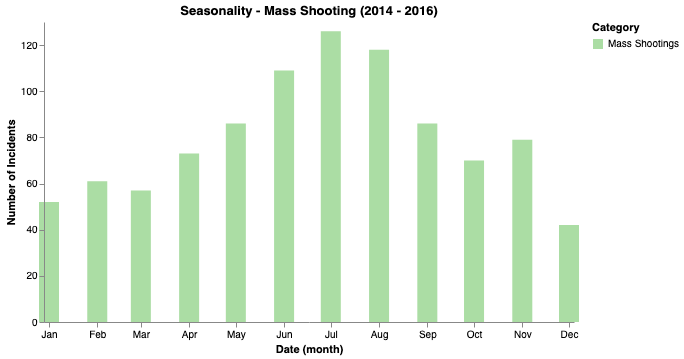

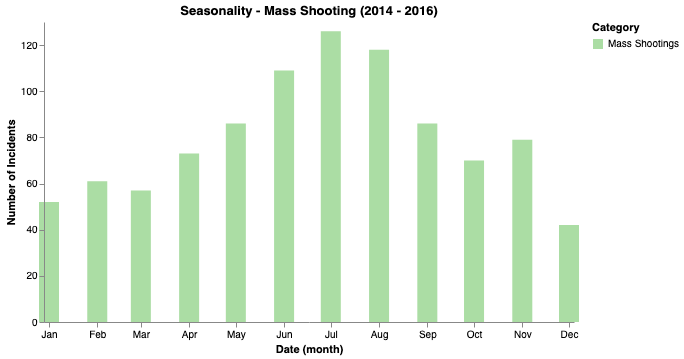

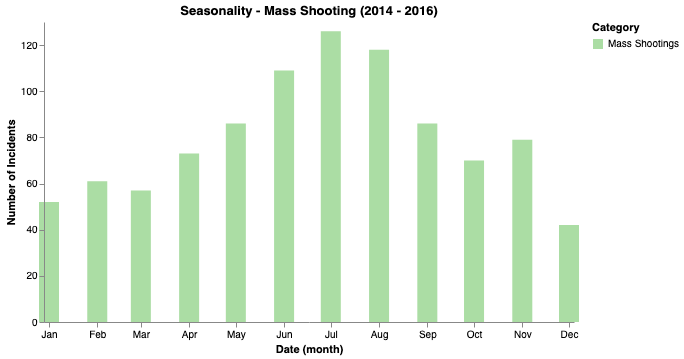

In [28]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Mass Shootings'], title='Seasonality - Mass Shooting (2014 - 2016)', name='seasonality_mass') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#abdda4'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Police Involvement Gun Violence Incidents

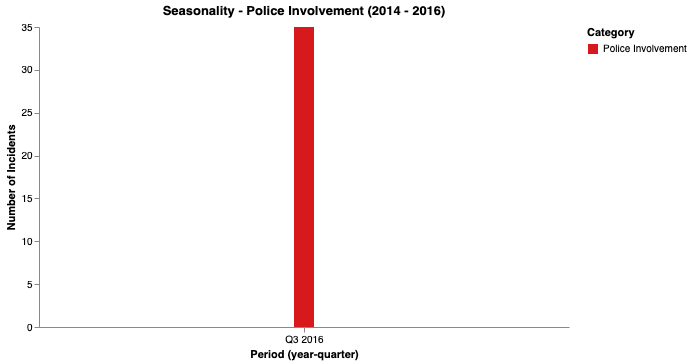

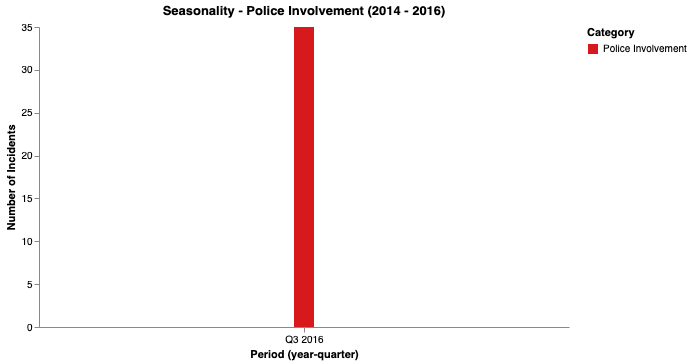

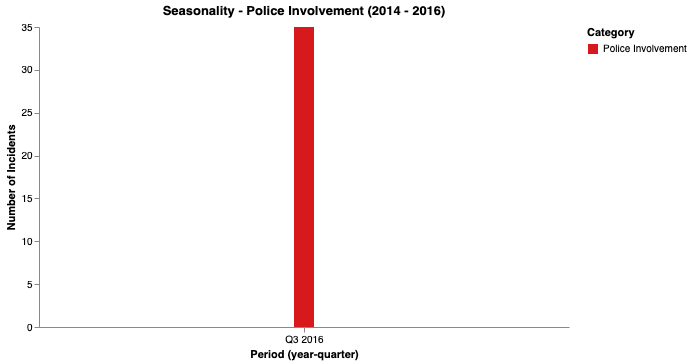

In [29]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Police Involvement'], title='Seasonality - Police Involvement (2014 - 2016)', name='seasonality_police') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#d7191c'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

### Observations

Looking at the charts, we can see that:
<ol>
    <li>There is an overall increasing trend to gun violence incidents in the United States between 20014 - 2018.</li>
    <li>There is a sudden spike in 2016 Q3 in Accidental and Intentional incidents from previous quarters.</li>
    <li>There is a higher occurence of Mass Shootings in Q3 compared to other quarters in all years.</li>
    <li>Accidental gun violence incidents are more common in the second half (July - December) of the year, with November recording the highest.</li>
    <li>Beginning March 2014, there is at least 1 reported incident of gun violence in the United States each month.</li>
</ol>
    

### Narrative

The above charts indicates that there is a seasonality to gun violence incidents, in that they usually occur during months with a holiday season or when the weather is warmer. For example, total Mass Shooting incidents in July is 142% higher than in January at 126 and 52 incidents, respectively. And while November and December are both festive months, November recorded a total of 328 incidents compared to 151 incidents in December for accidental incidents, a 117% difference.

## 3. Relationship between gun crimes across states and the average number of injuries or deaths

The following visualizations was created using Tableau as part of a data exploratory workbook, which can be found here: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016

![](Visualizations/2.png?raw=true)

#### Total gun violation occurence in the US categorized by different states in the order of most incidents to least.

![](Visualizations/6.png?raw=true)

#### Comparison of states within the US with highest average number of deaths or injuries due to gun violence crimes.

![](Visualizations/3.png?raw=true)

#### States with the highest number of deaths and injuries due to gun violence crimes.

### Narrative

Based on the above visualisations, the following can be deduced:
<ol>
<li>The states with the most average number of people injured from gun violence does not have the most average deaths from gun violence. </li>
<li>The states with largest number of gun crimes does not necessarily have the most severe consequence of people being injured or killed.</li>
<li>Some states may have lower number of gun crimes; however, those gun crimes have a more lethal effect. For instance, New Mexico is on the lower tail of the chart displaying total number of gun crimes, however, it has one of the most average number of deaths from gun violence thereby illustrating that gun violence in New Mexico tend to be more fatal.</li>
<li>States with warmer climate tend to have more instance of gun violence. </li>
</ol>

<hr/>

# Conclusion

Overall, gun violence in America is seeing an increasing trend, not only in incident occurrences, but also in victim counts, whether it be in numbers injured or killed. Additionally, months that have warmer temperatures or have major holiday/festive celebrations happenning are more likely to have gun violence incidents than months with lower temperatures. A quick search online on the corelation between temperatures and shooting incidents in the United States confirms this finding. One such report was an [article by The New York Times](https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html).

# Future Work

More work can be explored in terms of seasonality and the effects of weather on gun violence using the dataset. We can also run our analysis by victim age groups to see if there is also a pattern there.

<hr/>

# References

Dataset Source:  
**Kaggle** - https://www.kaggle.com/gunviolencearchive/gun-violence-database#officer_involved_shootings.csv  
**Gun Violence Archive** - https://www.gunviolencearchive.org/reports

Color Palette:  
**ColorBrewer 2.0** - http://colorbrewer2.org

Asher, J., (2018). A Rise in Murder? Let’s Talk About the Weather. _The New York Times_. Available at: https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html. Accessed on: May 25, 2019.

Tableau Link: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016

[EOF]